In [1]:
import numpy as np
from tensorflow import keras
import json

# Load Training data
with open('../data/training_4.json') as f:
    train_data = json.load(f)

# Load Testing data
with open('../data/testing_4.json') as f:
    test_data = json.load(f)

# Process Input data
train_numbers = np.array([item["data"] for item in train_data])
test_numbers = np.array([item["data"] for item in test_data])

train_numbers = train_numbers.reshape((-1, 45))
test_numbers = test_numbers.reshape((-1, 45))

# Process Labels
train_labels = np.array([item["value"] for item in train_data])
test_labels = np.array([item["value"] for item in test_data])

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import TensorBoard
import datetime

# Building Keras Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(45,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

# Compile Keras Model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [3]:
model.fit(
  train_numbers, # training data
  train_labels, # training targets
  epochs=10,
  batch_size=32,
  validation_data=(test_numbers, test_labels),
  callbacks=[tensorboard_callback]
)

model.save_weights('./models/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '_model.h5')

Train on 3000 samples, validate on 300 samples
Epoch 1/10
3000/3000 [==============================] - 0s 161us/sample - loss: 13.0523 - accuracy: 0.7677 - val_loss: 1.8951 - val_accuracy: 0.9167
Epoch 2/10
3000/3000 [==============================] - 0s 62us/sample - loss: 0.7020 - accuracy: 0.9593 - val_loss: 1.3759 - val_accuracy: 0.9500
Epoch 3/10
3000/3000 [==============================] - 0s 65us/sample - loss: 0.4033 - accuracy: 0.9750 - val_loss: 1.1132 - val_accuracy: 0.9533
Epoch 4/10
3000/3000 [==============================] - 0s 65us/sample - loss: 0.2583 - accuracy: 0.9790 - val_loss: 0.8849 - val_accuracy: 0.9633
Epoch 5/10
3000/3000 [==============================] - 0s 63us/sample - loss: 0.2521 - accuracy: 0.9777 - val_loss: 0.8989 - val_accuracy: 0.9667
Epoch 6/10
3000/3000 [==============================] - 0s 65us/sample - loss: 0.1639 - accuracy: 0.9830 - val_loss: 0.6692 - val_accuracy: 0.9667
Epoch 7/10
3000/3000 [==============================] - 0s 63us/sampl

In [4]:
# from tensorflow.keras.utils import to_categorical

# model.evaluate(
#   test_numbers,
#   to_categorical(test_labels)
# )

# Predict on the first 5 test images.

# Load Testing data
with open('../data/testing_2.json') as f:
    test_data = json.load(f)
    
test_labels = np.array([item["value"] for item in test_data])
test_numbers = np.array([item["data"] for item in test_data])
test_numbers = test_numbers.reshape((-1, 45))

predictions = model.predict(test_numbers)

pred_array = np.argmax(predictions, axis=1)
actual_array = test_labels

# # Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# # Check our predictions against the ground truths.
print(test_labels) # [7, 2, 1, 0, 4]

# np.setdiff1d(pred_array, actual_array)

[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7 8 8 8 9 9 9]
[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7 8 8 8 9 9 9]


In [5]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, './models/')

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


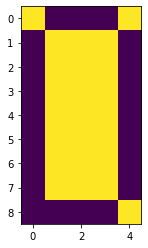

[0]


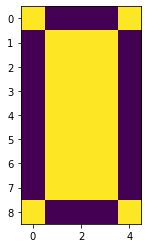

[0]


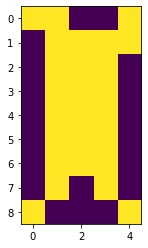

[0]


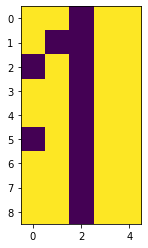

[1]


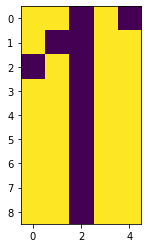

[1]


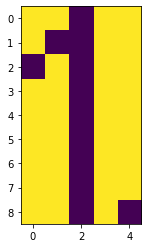

[1]


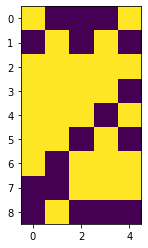

[2]


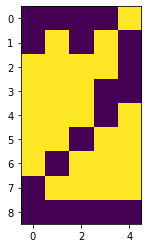

[2]


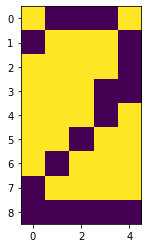

[2]


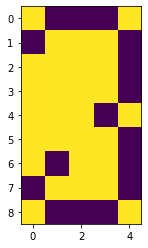

[3]


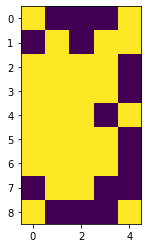

[3]


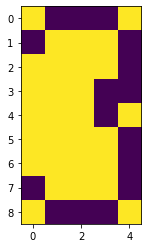

[3]


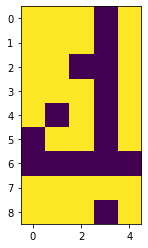

[4]


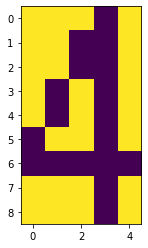

[4]


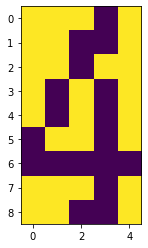

[4]


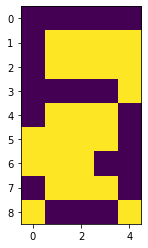

[5]


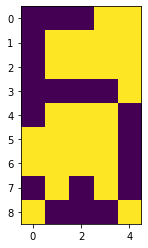

[5]


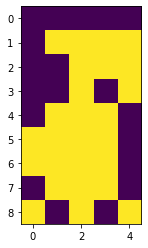

[5]


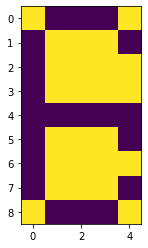

[6]


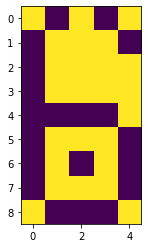

[6]


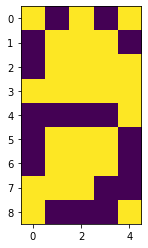

[6]


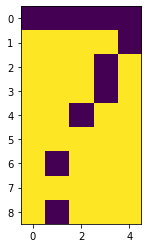

[7]


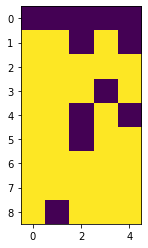

[7]


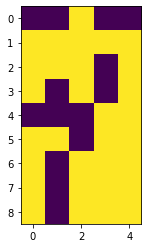

[7]


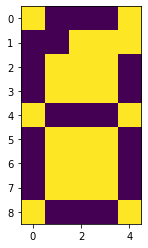

[8]


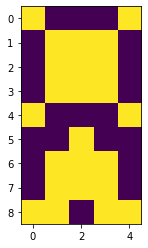

[8]


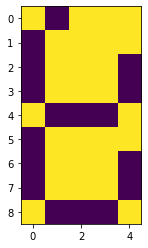

[8]


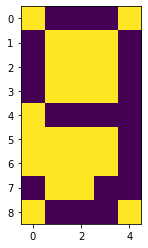

[9]


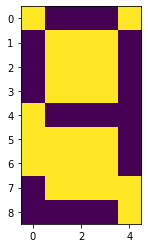

[9]


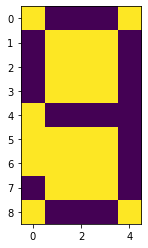

[9]


In [44]:
import matplotlib.pyplot as plt

for number in test_numbers:    
    test = number.reshape(5, 9)
    plt.imshow(np.rot90(np.flip(test, 1)))
    plt.show()

    print(np.argmax(model.predict(number.reshape(-1,45)), axis=1))